# Identifing the flowers images using CNN

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import cv2
import numpy as np

In [7]:
#for train and testing

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#For cnn model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten ,Activation , Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD ,Adagrad , Adadelta, RMSprop

#plot images

import matplotlib.pyplot as plt

folder_dir = "D:\\flowers"

In [8]:
data = []
label = []

SIZE = 128 #for changing img size to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

Now let's convert the data into numerical values

In [9]:
data_arr = np.array(data)
label_arr = np.array(label)

Now let's use the Label encoder and normalize the data

In [10]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
x = data_arr/255

The next step is to split the dataset into 80% training and 20% test sets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=10)

Now let's build a  neural network model for the task of Flower recognition

In [12]:
model= Sequential()
model.add(Conv2D(filters = 8, kernel_size= (3,3),padding = 'Same',activation ='relu', input_shape= (SIZE,SIZE,3)))
model.add(MaxPooling2D (pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5,activation = "softmax"))

Before compiling t he model we need to create more things

In [13]:
datagen = ImageDataGenerator(
        rotation_range = 20,
        zoom_range = 0.20,
        width_shift_range = 0.3,
        height_shift_range=0.3,
        horizontal_flip = True,
        vertical_flip = True)

datagen.fit(x_train)

Now let's compile the neural model

In [14]:
model.compile(optimizer = Adam(lr=0.0001),loss= 'categorical_crossentropy', metrics=["accuracy"])
batch_size=32
epochs=8
history = model.fit_generator(datagen.flow(x_train,y_train , batch_size = batch_size),
                              epochs = epochs,
                              validation_data = (x_test,y_test),
                              verbose = 1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8792\2585004910.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train , batch_size = batch_size),


Epoch 1/8
95/95 [==============================] - 222s 2s/step - loss: 1.5348 - accuracy: 0.3078 - val_loss: 1.3590 - val_accuracy: 0.4092
Epoch 2/8
95/95 [==============================] - 212s 2s/step - loss: 1.3372 - accuracy: 0.4018 - val_loss: 1.3044 - val_accuracy: 0.4331
Epoch 3/8
95/95 [==============================] - 240s 3s/step - loss: 1.2631 - accuracy: 0.4569 - val_loss: 1.3541 - val_accuracy: 0.5062
Epoch 4/8
95/95 [==============================] - 237s 2s/step - loss: 1.1869 - accuracy: 0.5111 - val_loss: 1.1370 - val_accuracy: 0.5377
Epoch 5/8
95/95 [==============================] - 232s 2s/step - loss: 1.1040 - accuracy: 0.5602 - val_loss: 1.1589 - val_accuracy: 0.5162
Epoch 6/8
95/95 [==============================] - 230s 2s/step - loss: 1.0789 - accuracy: 0.5751 - val_loss: 1.0371 - val_accuracy: 0.5938
Epoch 7/8
95/95 [==============================] - 215s 2s/step - loss: 1.0503 - accuracy: 0.5724 - val_loss: 1.0629 - val_accuracy: 0.6254
Epoch 8/8
95/95 [===

41/41 [==============================] - 23s 562ms/step


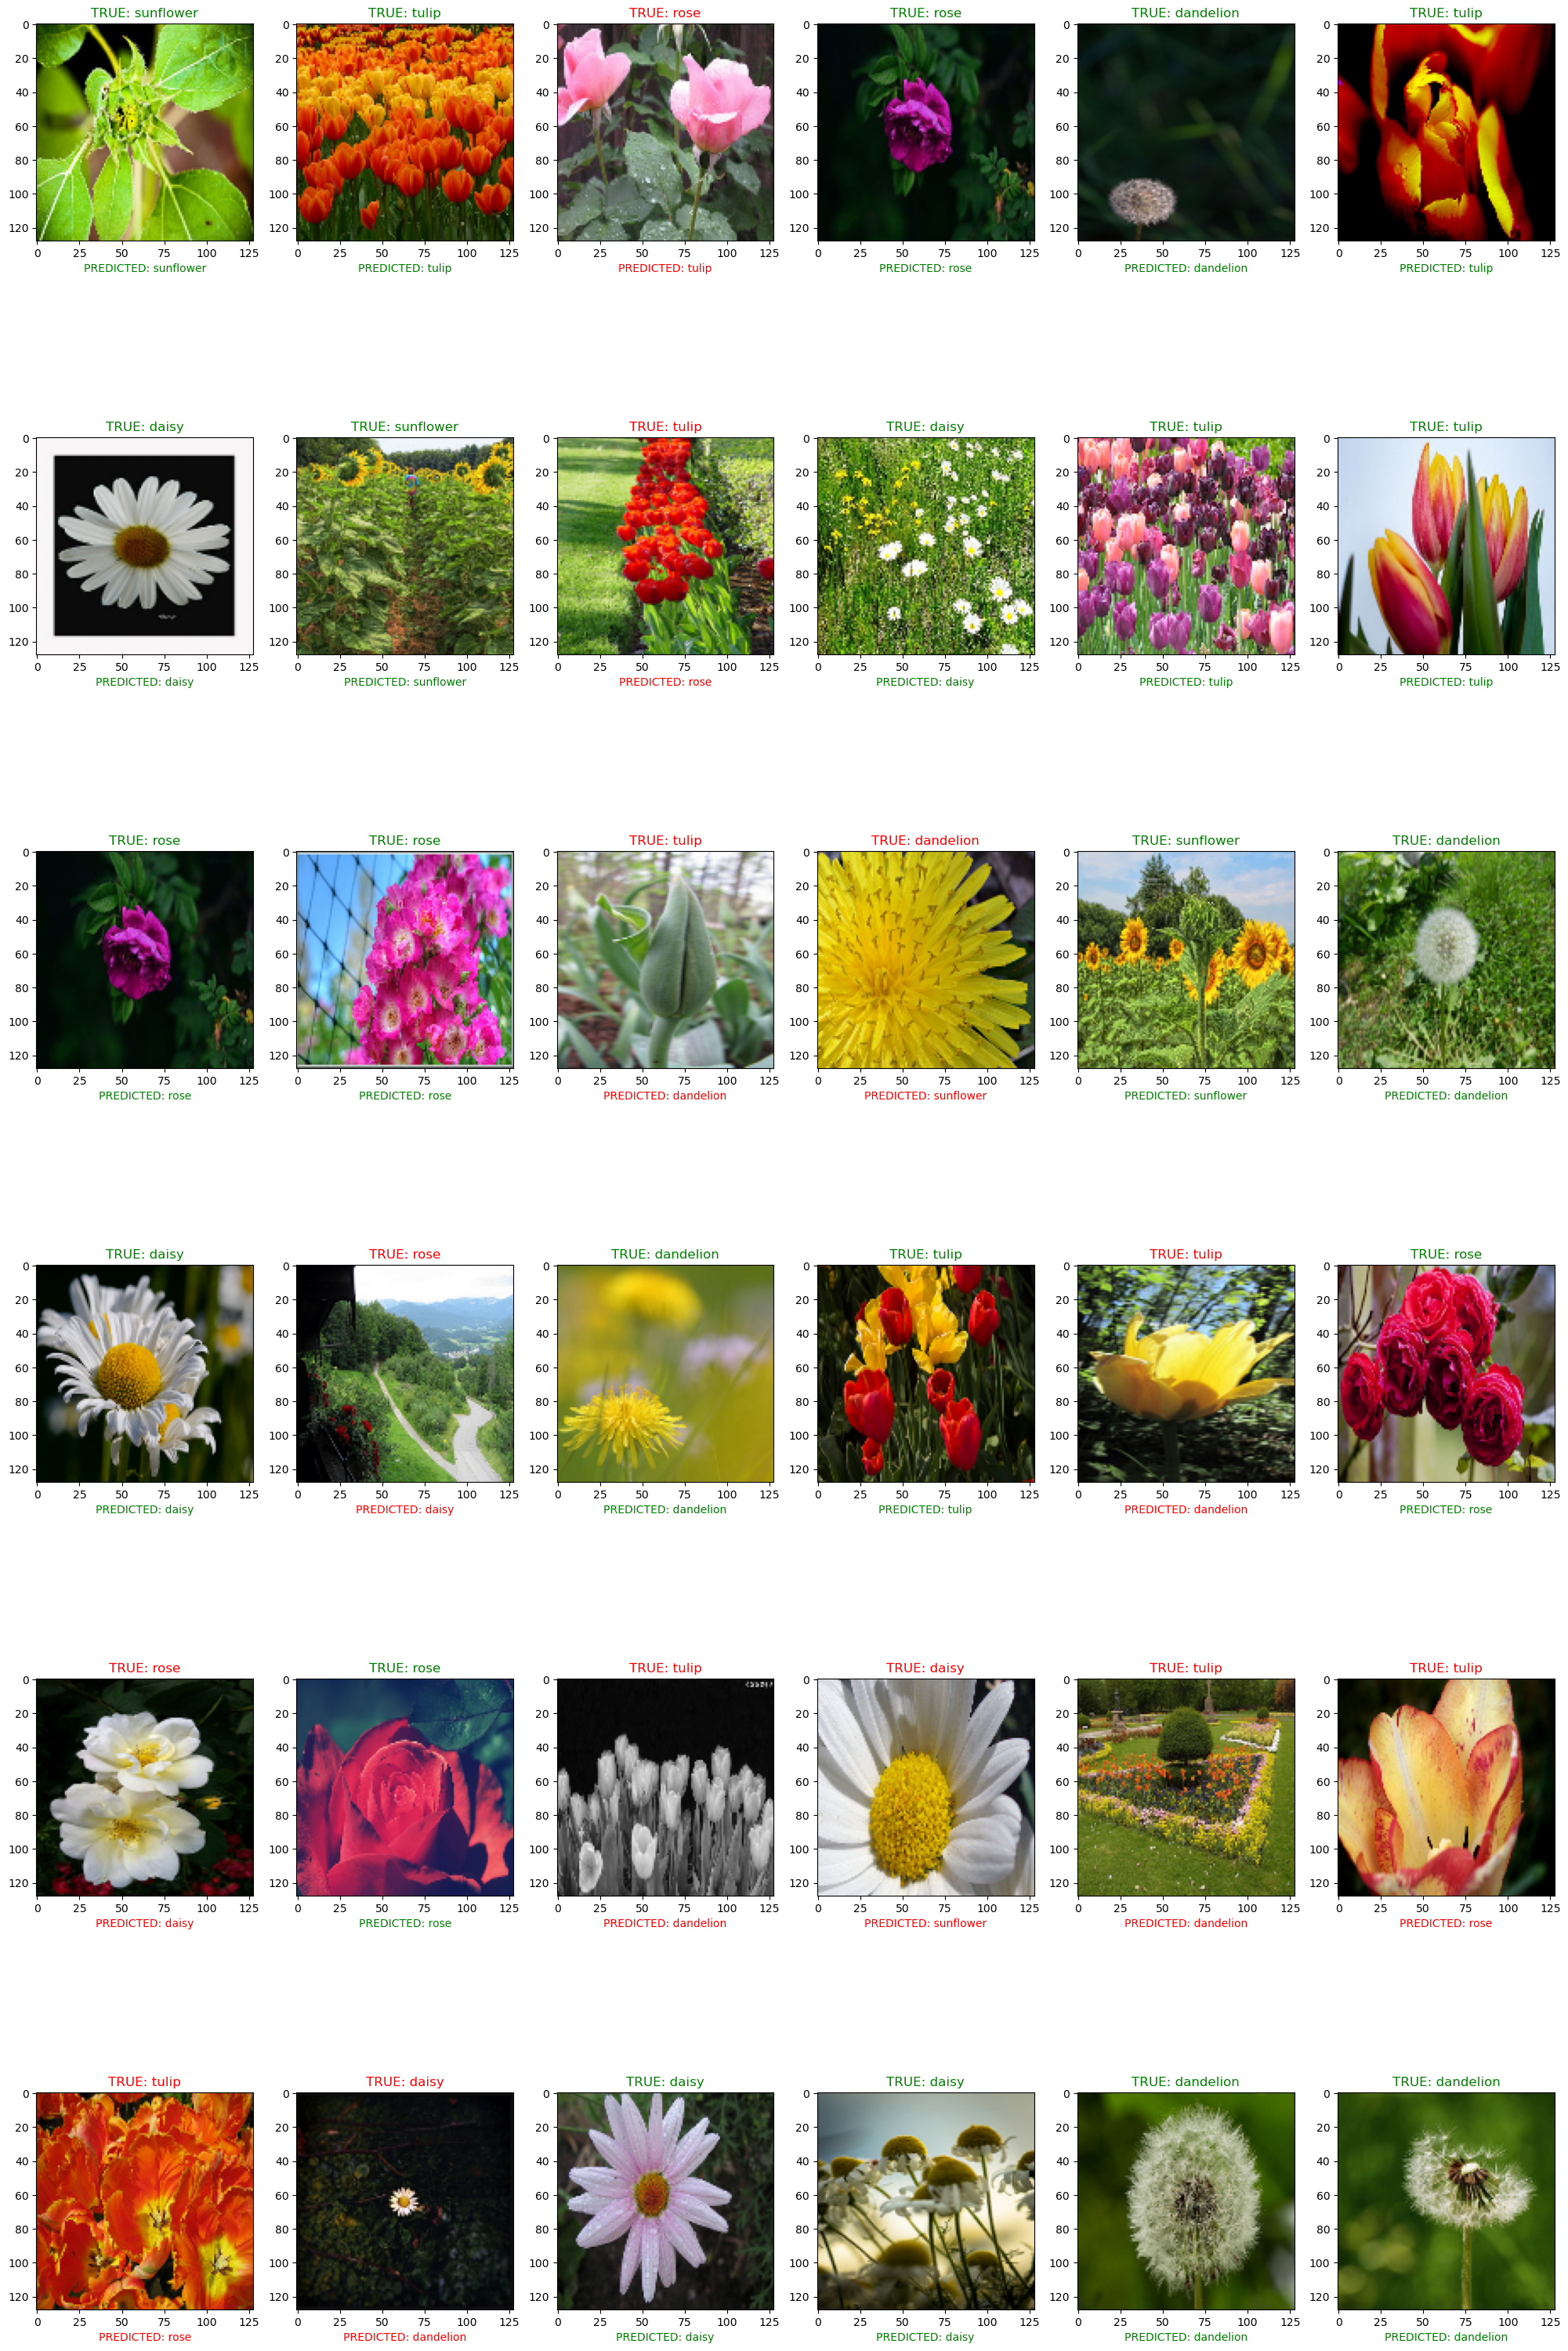

In [15]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(x_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')